In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib as mt
#from matplotlib.lines import Line2D
import numpy.polynomial.polynomial as poly
import glob
import gc
from scipy import stats
from lmfit import Model
from lmfit.models import LinearModel, LorentzianModel,GaussianModel,SkewedGaussianModel,ExponentialGaussianModel,ExponentialModel,PolynomialModel


In [2]:
#File_Directory = '/Volumes/My Book/scripts/Analysis/Python_Analysis/Data_Files/Cherenkov_Calibration/H3/kin16'
File_Directory = '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16'

In [4]:
H3_List = []
H3_List.append(glob.glob(File_Directory + '/Run_*.csv'))

In [5]:
H3_List.sort()

In [6]:
len(H3_List[0])

14

In [7]:
H3_List[0]

['/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91017.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91015.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91358.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_90906.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91239.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91254.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91308.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91296.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91251.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3/kin16/Run_91293.csv',
 '/Users/michaelnycz/Documents/Pass2_Analysis/Cherenkov_Calibration/H3

In [8]:
H3=[]
for i in range(0,len(H3_List[0])):
    H3.append(pd.read_csv(H3_List[0][i]))

In [9]:
H3_Total=[]
#for i in range(0,len(H3)):
    #H3_Total.append(H3[i])
H3_Total=pd.concat([H3[0],H3[1],H3[2],H3[3],H3[4],H3[5],H3[6],H3[7],H3[8],H3[9],H3[10],H3[11],H3[12],H3[13]],axis=0,ignore_index=True)    

In [38]:
H3_Total.tail()

,Cher_Un_0,Cher_Un_1,Cher_Un_2,Cher_Un_3,Cher_Un_4,Cher_Un_5,Cher_Un_6,Cher_Un_7,Cher_Un_8,Cher_Un_9,...,Cher_Cor_9,Cher_Sum,Track,prl1_e,prl2_e,E_p,z,phi,theta,dp
1276568,-40.0000,314.3330,-47.6665,-27.6665,-4.3335,-11.0000,20.6665,-41.3335,-26.333500,-28.0000,...,-27.5545,252.8300,0,24.3608,40.6751,inf,-0.580980,0.136890,-1.538730,-0.101818
1276569,-26.3335,8.6665,13.6665,9.3335,6785.0000,11.6665,-4.6665,11.0000,0.333496,21.3335,...,20.9941,6966.5400,0,43.6567,18.8209,inf,-0.580980,0.136890,-1.538730,-0.101818
1276570,6992.6700,29.3335,11.0000,44.3335,-25.6665,19.6665,11.3335,13.6665,-43.666500,34.6665,...,34.1150,6544.8200,0,97.7418,32.9385,inf,-0.580980,0.136890,-1.538730,-0.101818
1276571,-18.0000,-38.0000,-4.6665,-11.6665,-51.3335,-32.3335,10.6665,-25.6665,6.000000,-45.0000,...,-44.2840,16.1254,0,333.8780,28.4138,inf,-0.580980,0.136890,-1.538730,-0.101818
1276572,49.0000,-4.3335,2.6665,-2.3335,626.0000,8.3335,28.0000,22.3335,11.666500,39.6665,...,39.0354,790.5130,1,64.6890,35.3000,inf,-0.179314,-0.047973,-0.020179,-0.000588


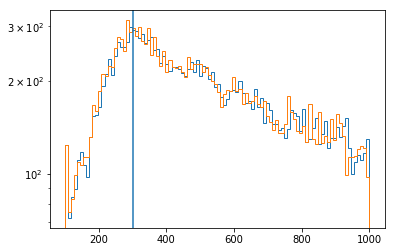

In [12]:
plt.hist(H3_Total['Cher_Un_9'],bins=100,histtype='step',range=[100,1000])
plt.hist(H3_Total['Cher_Cor_9'],bins=100,histtype='step',range=[100,1000])
plt.axvline(300,0,1)
plt.yscale('log')

In [190]:
#y_data=[]
#x_data=[]
#x_boarder = []
#y_data,x_boarder,_ = plt.hist(H3_Total['Cher_Un_0'],bins=100,range=[100,1000],histtype='step')
#x_data = x_boarder[:-1] + np.diff(x_boarder) / 2

In [13]:
Cher = H3_Total.columns.get_values()

In [14]:
Cher[0]

'Cher_Un_0'

In [15]:
#plt.hist(H3_Total[Cher[0]],bins=100,range=[100,2000],histtype='step')

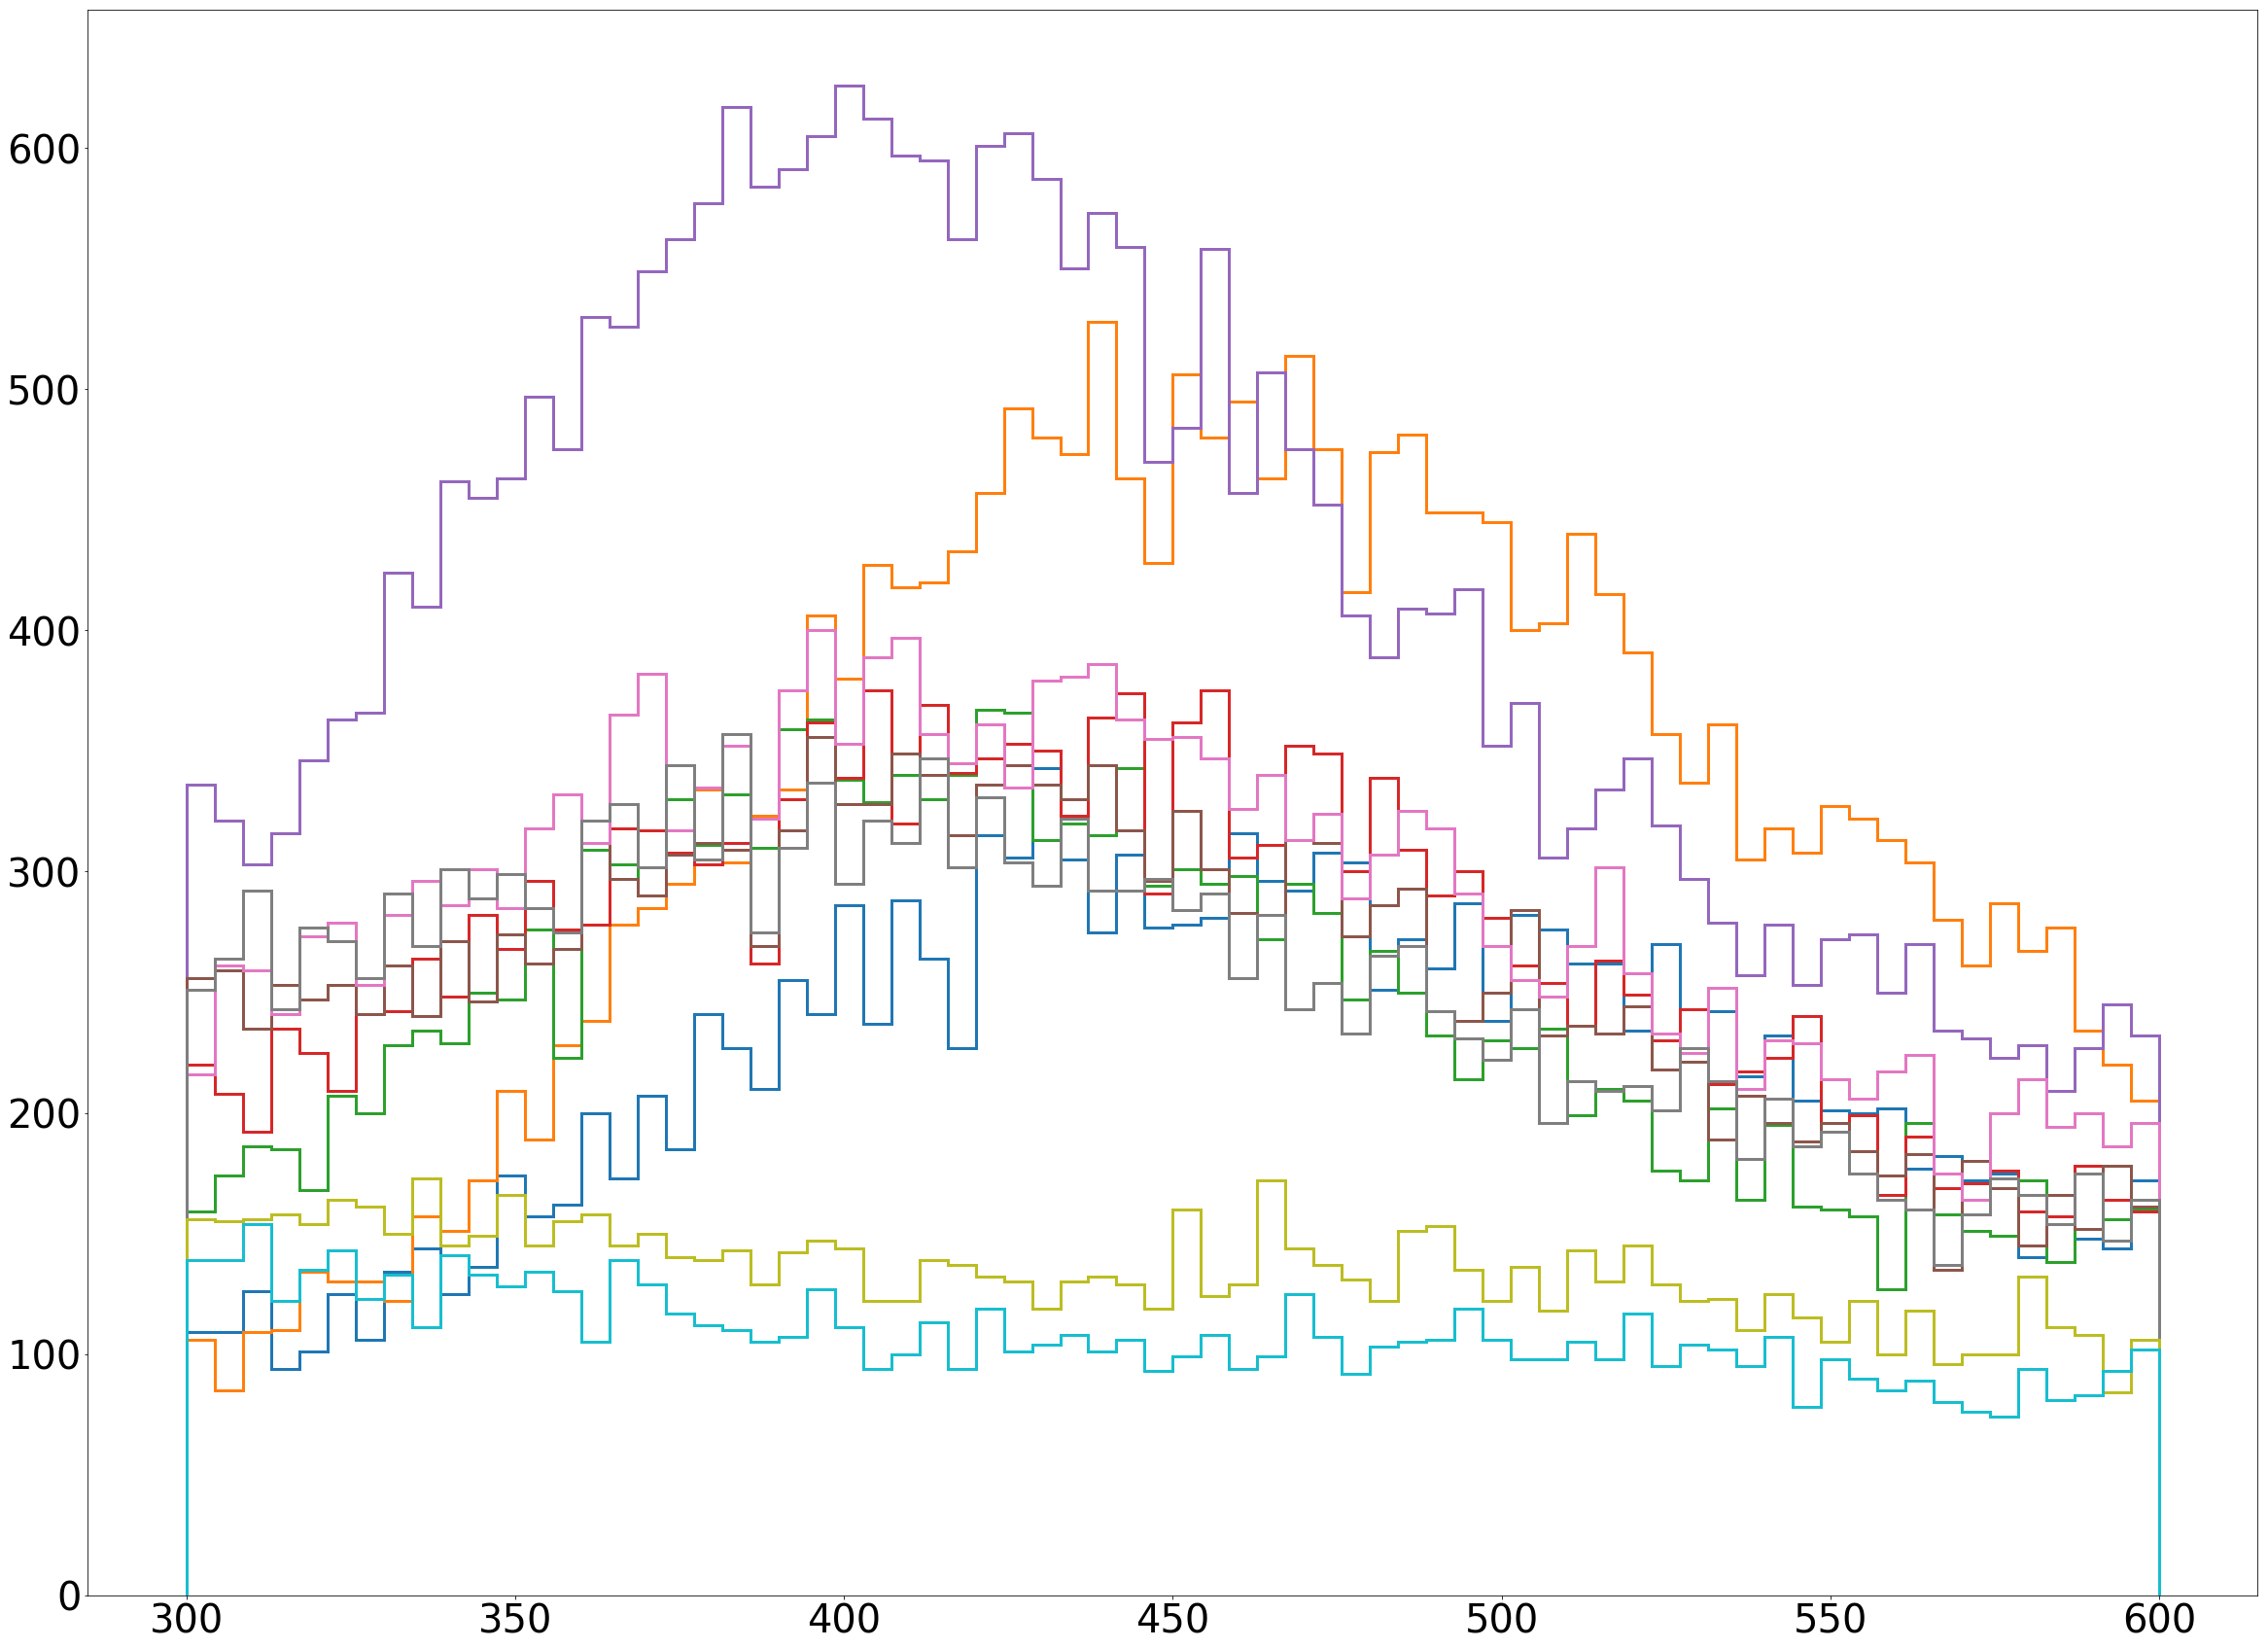

In [17]:
y_data=[[],]*10
x_data=[[],]*10
x_boarder = [[],]*10
for i in range(0,10):
    y_data[i],x_boarder[i],_ = plt.hist(H3_Total[Cher[i]],bins=70,range=[300,600],histtype='step',linewidth=3)
    x_data[i] = x_boarder[i][:-1] + np.diff(x_boarder[i]) / 2
plt.rcParams["figure.figsize"] =[40,30]
plt.rc('xtick',labelsize=40)
plt.rc('ytick',labelsize=40)   

In [18]:
Gaussian=GaussianModel(prefix='gaus_')
#pars_gaus=Gaussian.guess(y_data,x=x_data)

In [19]:
pars_gaus=[[]]*10
for i in range(0,len(x_data)):
    pars_gaus[i]=Gaussian.guess(y_data[i],x=x_data[i])

In [20]:
Gaussian_output=[[]]*10
for i in range(0,len(x_data)):
    Gaussian_output[i] = Gaussian.fit(y_data[i],pars_gaus[i],x=x_data[i])

In [88]:
#Gaussian_output[9]

In [89]:
#Gaussian_output = Gaussian.fit(y_data,pars_gaus,x=x_data)

In [21]:
Gauss_Mean = [[]]*10
Gauss_Sigma = [[]]*10
Gauss_Amp = [[]]*10

for i in range(0,len(x_data)):
    Gauss_Mean[i] = Gaussian_output[i].params['gaus_center'].value
    Gauss_Sigma[i] = Gaussian_output[i].params['gaus_sigma'].value
    Gauss_Amp[i] = Gaussian_output[i].params['gaus_amplitude'].value


In [22]:
Gauss_Mean[1],Gauss_Sigma[0]

(467.3411201397506, 104.7106268774495)

In [23]:
for i in range(0,2):
    print(Gaussian_output[i].params['gaus_center'].value)

462.58081238960574
467.3411201397506


In [24]:
print(Gaussian_output[1].params['gaus_center'].value),print(Gaussian_output[1].params['gaus_sigma'].value)

467.3411201397506
92.46981432372047


(None, None)

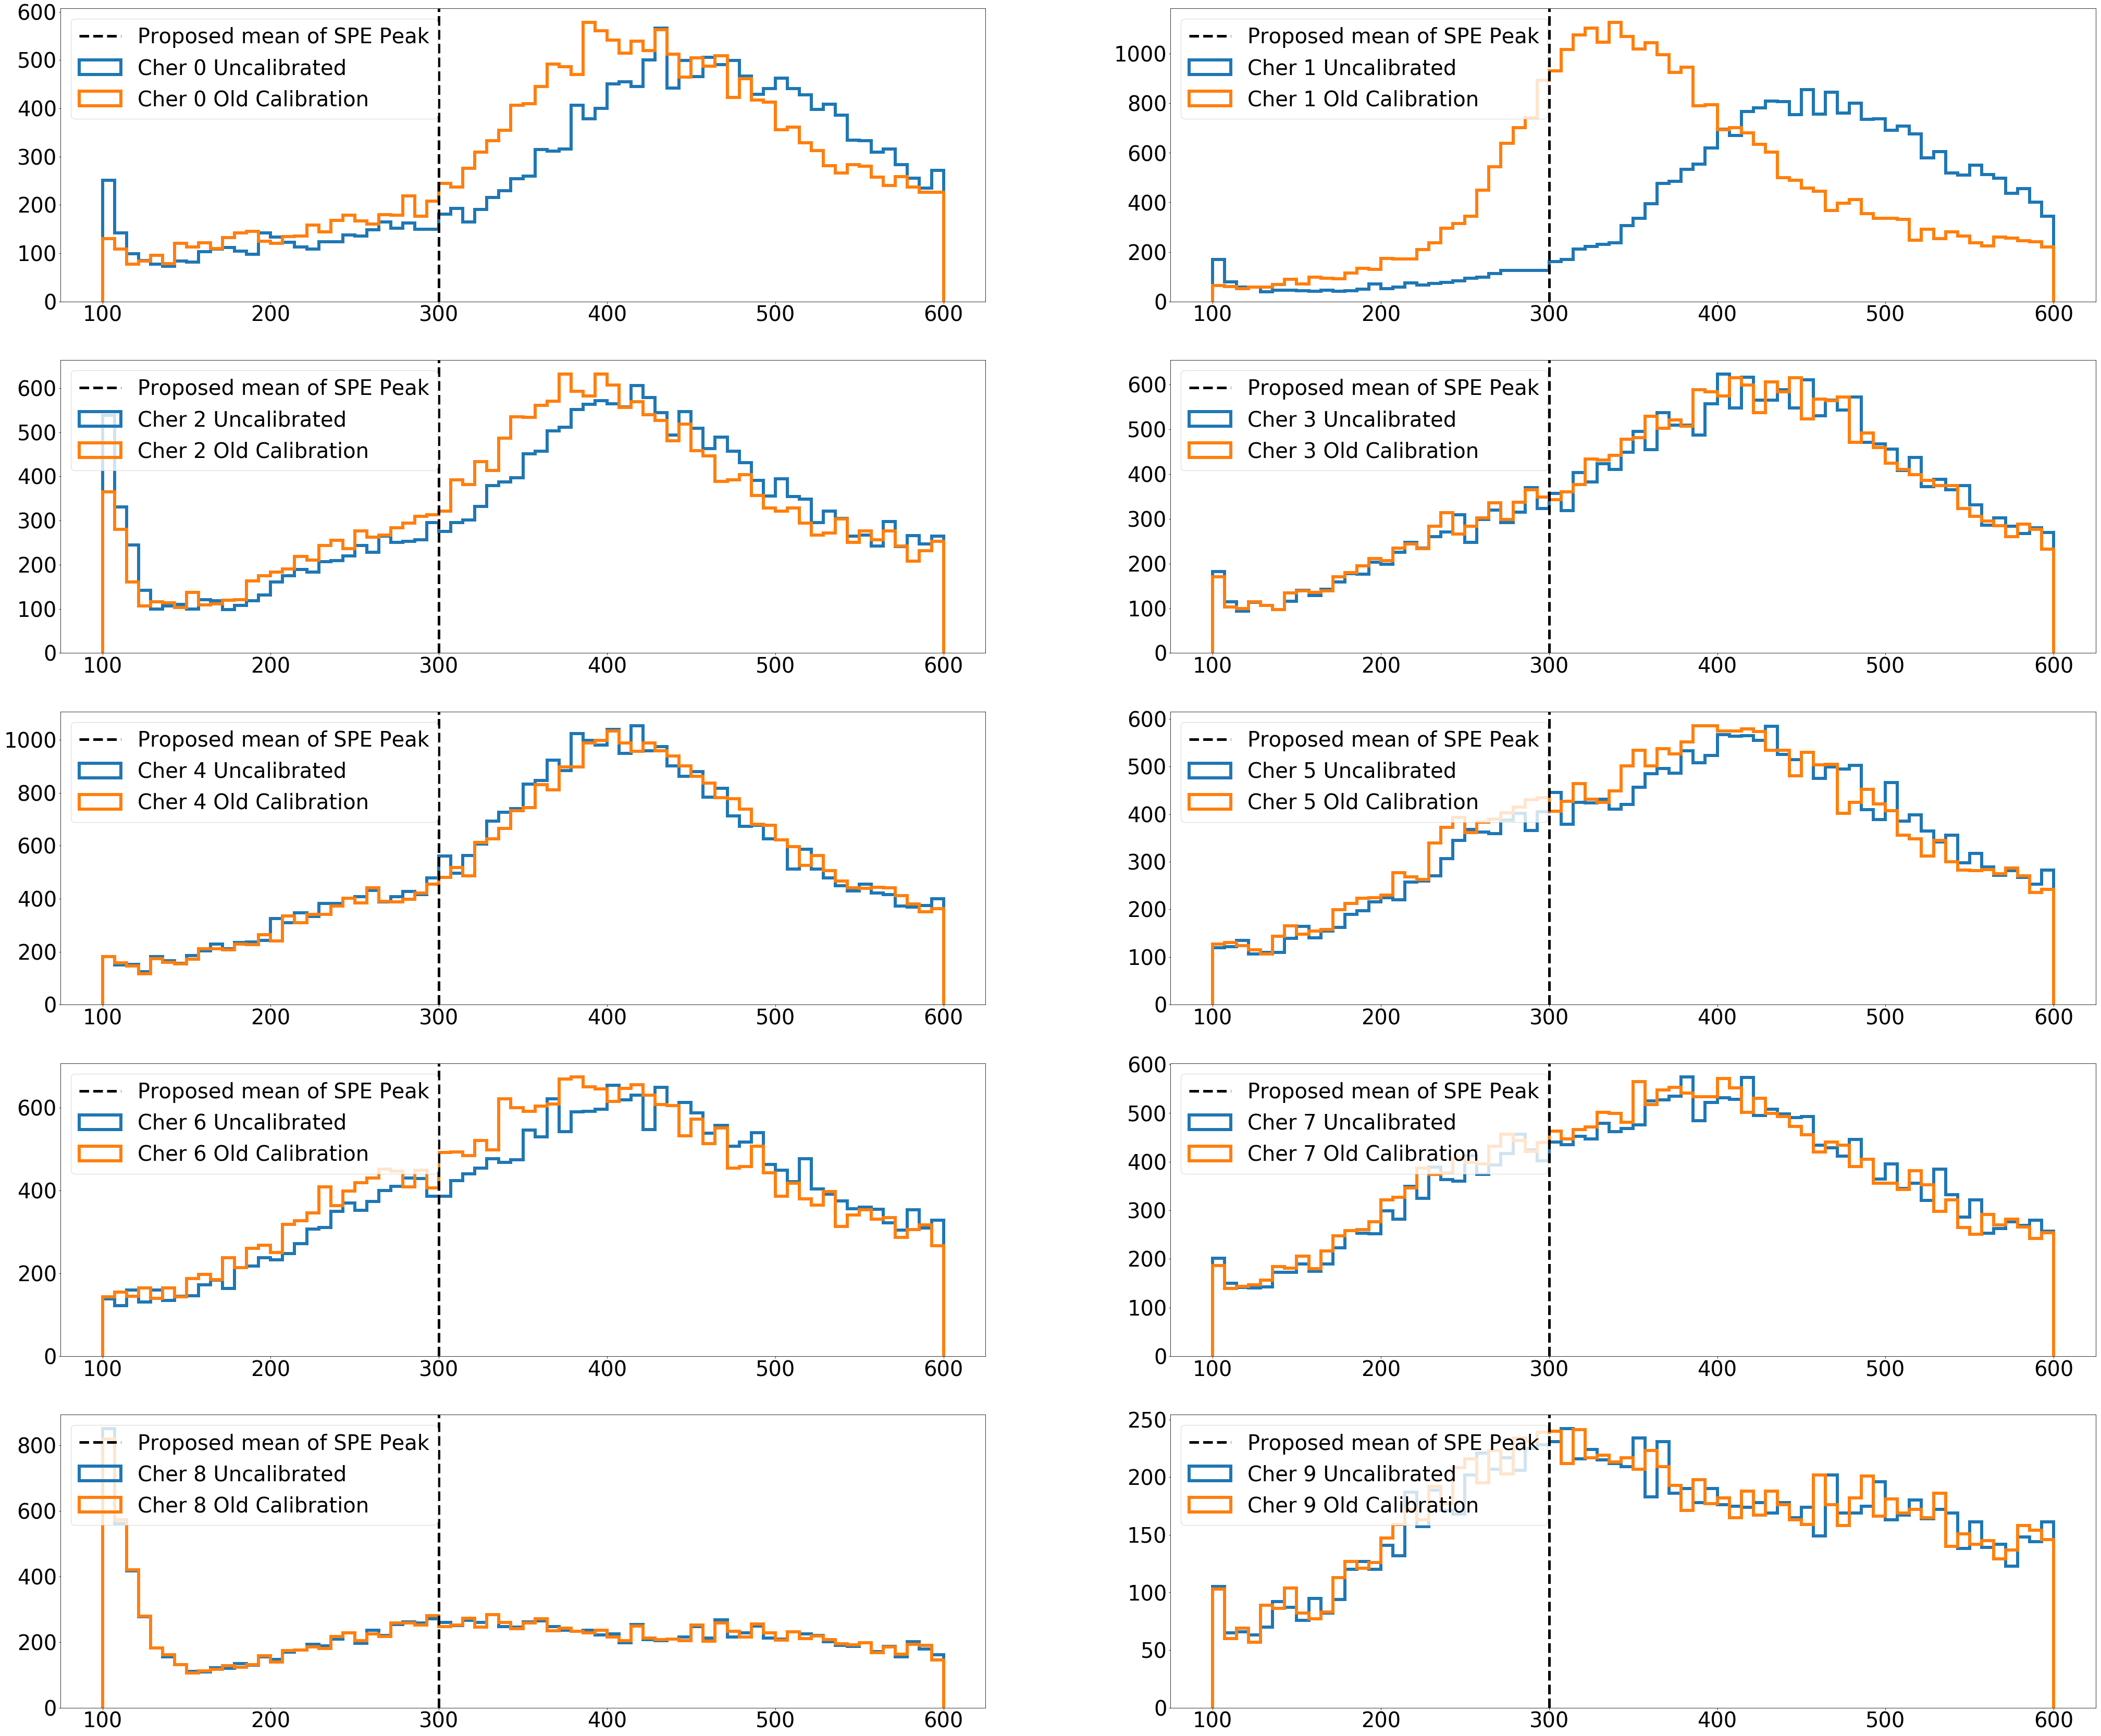

In [43]:
fig0=plt
for i in range(0,10):
    plt.subplot(5,2,i+1)
    plt.hist(H3_Total[Cher[i]],bins=70,histtype='step',range=[100,600],linewidth=6,label='Cher %d Uncalibrated'%i)
    plt.hist(H3_Total[Cher[i+10]],bins=70,histtype='step',range=[100,600],linewidth=6,label='Cher %d Old Calibration'%i)
    plt.axvline(300,0,1,color='black',linestyle='--',linewidth=5,label='Proposed mean of SPE Peak')
    plt.rcParams["figure.figsize"] =[70,60] 
    plt.rc('xtick',labelsize=40)
    plt.rc('ytick',labelsize=40)   
    plt.legend(loc=2,fontsize=40)
#fig0.savefig('/Users/michaelnycz/Documents/Pass2_Analysis/Images/Final_Ratio_Images/Cherenkov_Calib/Comparison_plot.png',fmt='png')


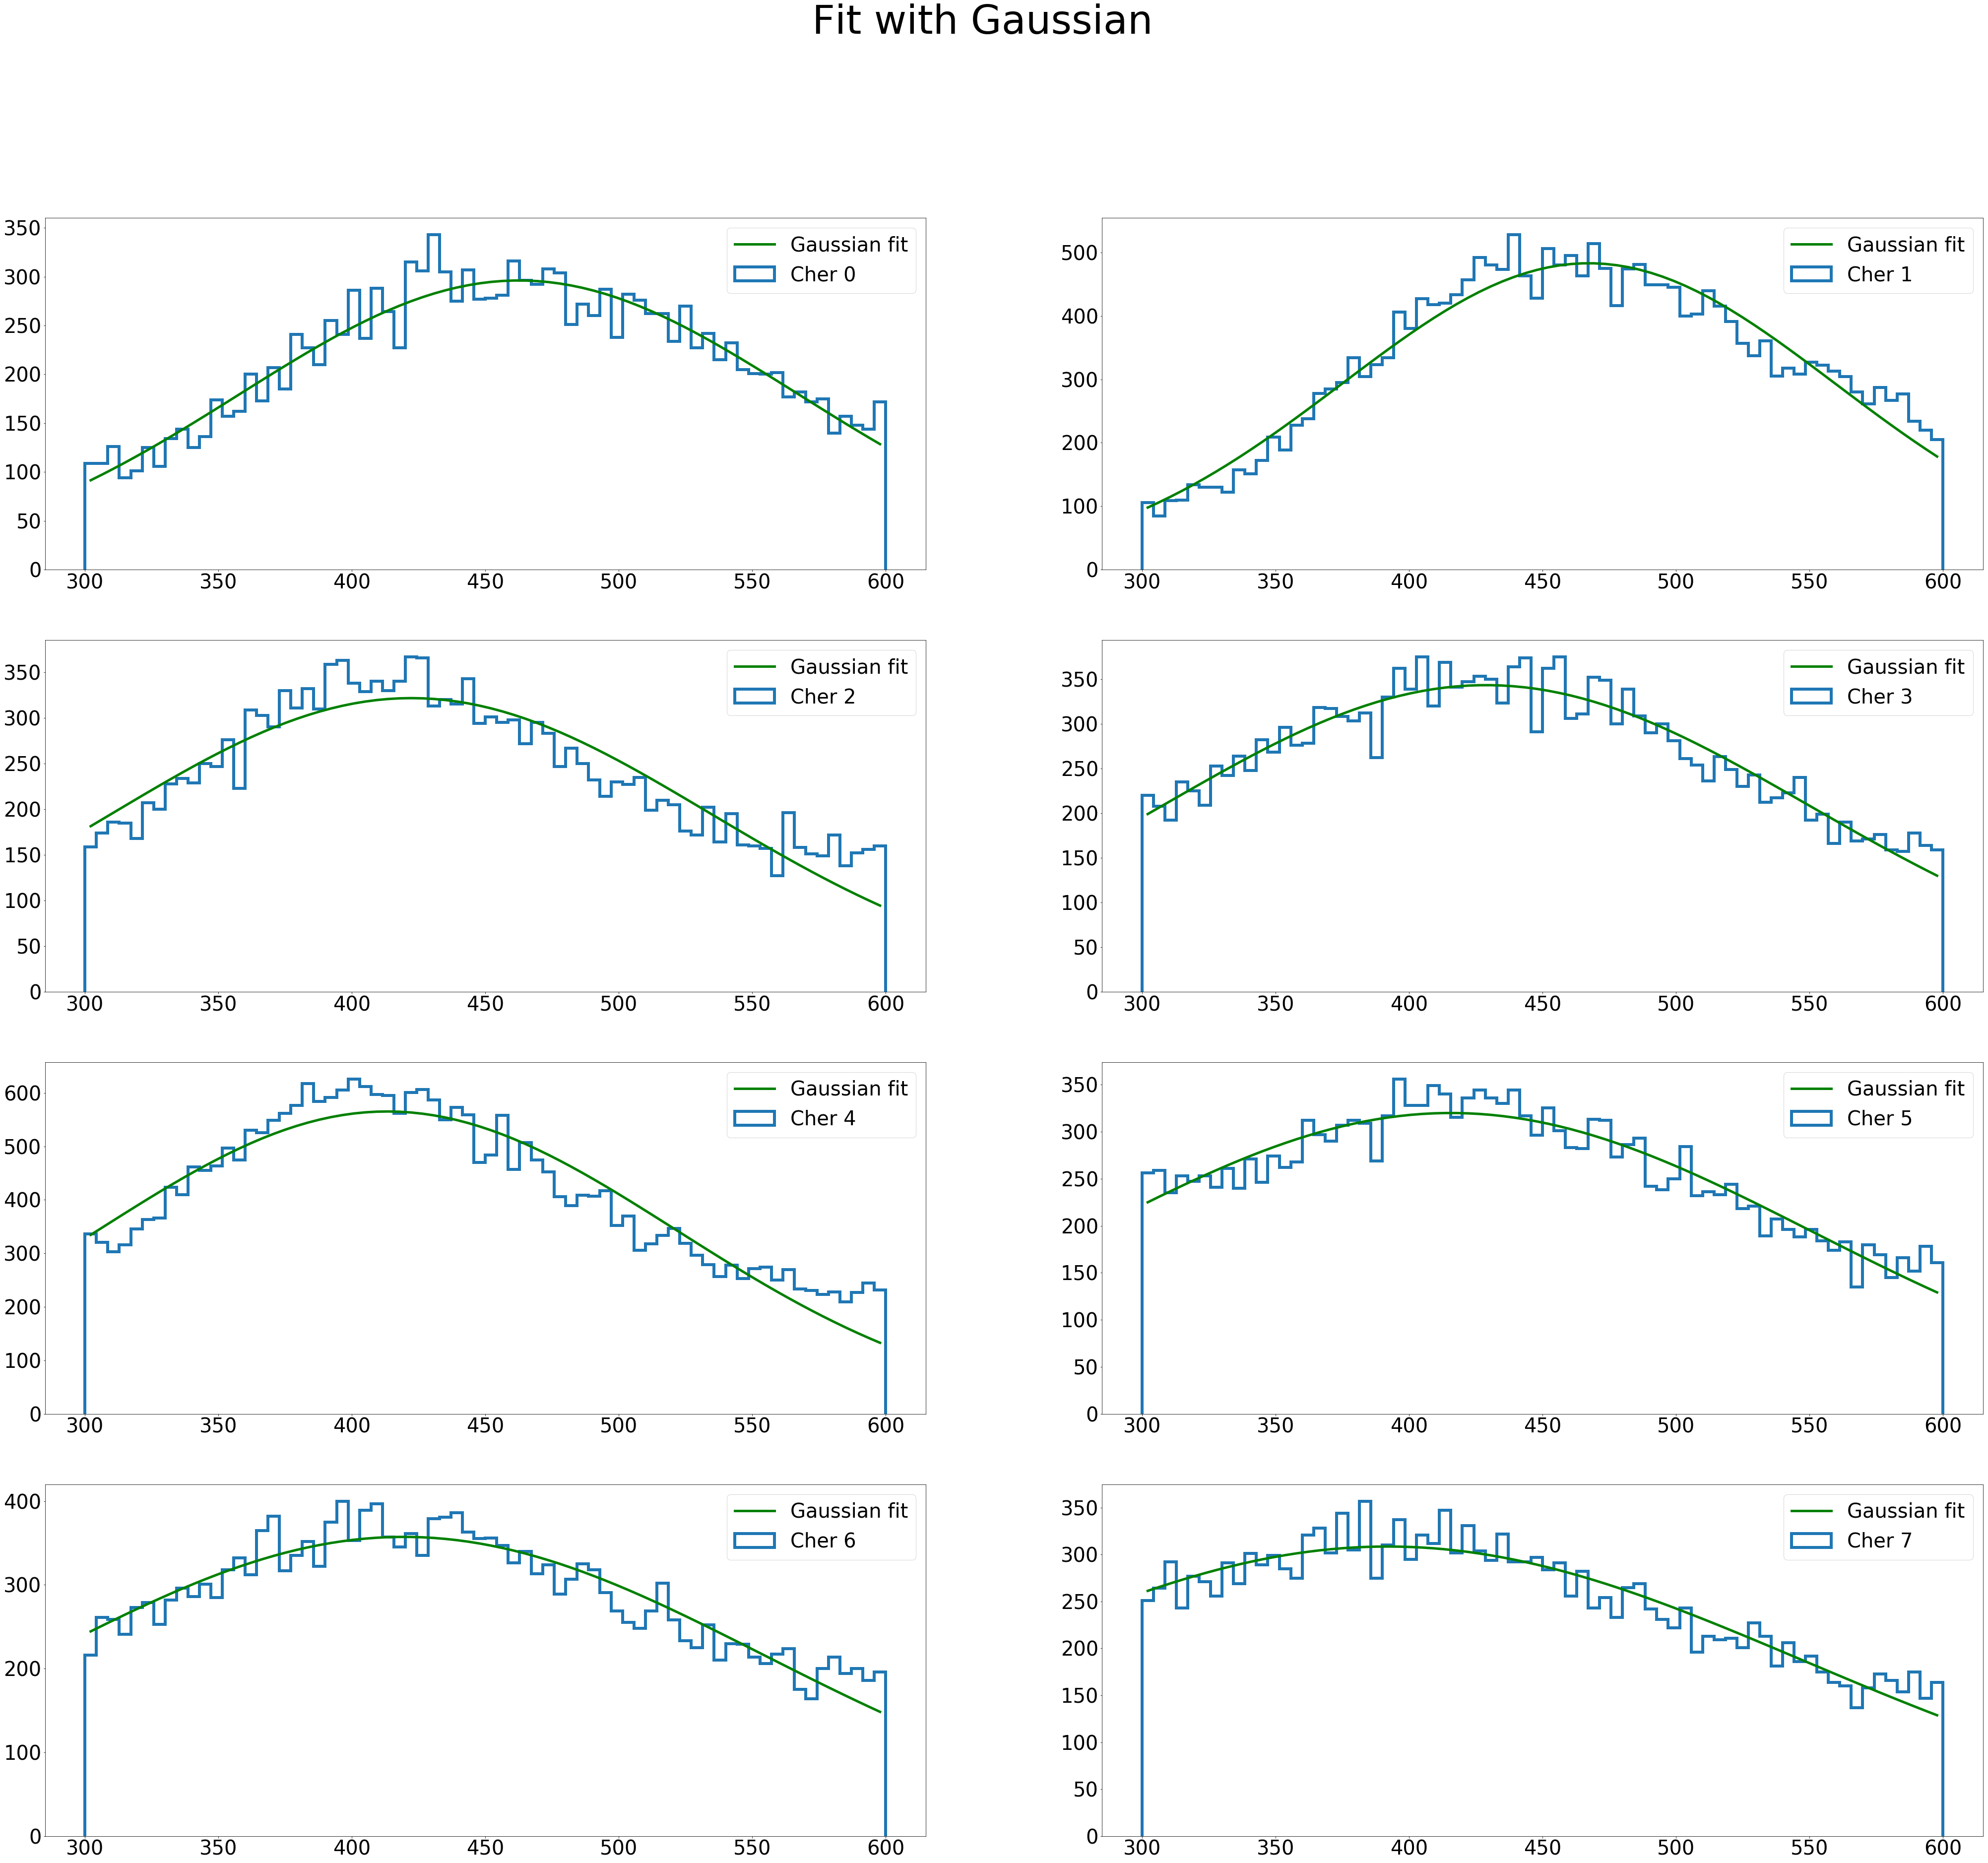

In [42]:
fig1=plt
fig1.suptitle('Fit with Gaussian',fontsize=80)
for i in range(0,8):
    #plt.subplot(5,2,i+1)
    plt.subplot(4,2,i+1)
    plt.hist(H3_Total[Cher[i]],bins=70,histtype='step',range=[300,600],linewidth=6,label='Cher %d'%i)
    plt.plot(x_data[i],Gaussian_output[i].best_fit,'g-',linewidth=5,label='Gaussian fit')
    #plt.axvline(300,0,1,color='black',linestyle='--',linewidth=5)
    plt.rcParams["figure.figsize"] =[50,40]
    plt.rc('xtick',labelsize=40)
    plt.rc('ytick',labelsize=40)   
    plt.legend(loc=1,fontsize=40)

#fig1.savefig('/Users/michaelnycz/Documents/Pass2_Analysis/Images/Final_Ratio_Images/Cherenkov_Calib/Gaus_fit.png',fmt='png')



In [26]:
Gain = []
def Gain_Factor(x):
    return(300/x)

Gain = np.vectorize(Gain_Factor)(Gauss_Mean)

In [41]:
Gain

array([ 0.64853533,  0.64192939,  0.71052068,  0.69958527,  0.72595649,
        0.72173664,  0.71528869,  0.76543106,  1.88558575, -0.01168401])

In [44]:
H3_Total

,Cher_Un_0,Cher_Un_1,Cher_Un_2,Cher_Un_3,Cher_Un_4,Cher_Un_5,Cher_Un_6,Cher_Un_7,Cher_Un_8,Cher_Un_9,...,Cher_Cor_9,Cher_Sum,Track,prl1_e,prl2_e,E_p,z,phi,theta,dp
0,29.000000,-32.666500,-24.3335,-5.000000,751.333000,3.333500,-20.333500,-27.333500,9.000000,-44.000000,...,-43.30000,802.22800,0,111.35500,41.52980,inf,0.000000,0.000000,0.000000,0.000000
1,352.000000,-24.000000,-27.0000,-0.333496,17.333500,-4.000000,4.000000,10.000000,-11.000000,-16.333500,...,-16.07360,352.90200,0,60.72800,24.95200,inf,0.000000,0.000000,0.000000,0.000000
2,-8.000000,26.666500,-7.6665,-10.000000,-1.666500,-2.000000,-5.333500,3860.670000,-9.000000,-6.666500,...,-6.56044,3782.39000,2,60.36430,32.96910,inf,2.274500,-0.000093,-2.472920,-0.135705
3,-2.333500,-37.666500,-9.0000,-16.666500,-16.666500,-3.666500,15.666500,-8.333500,8.333500,-32.000000,...,-31.49090,23.20370,1,118.79700,1348.07000,inf,0.122566,0.008784,-0.014325,-0.012835
4,13.666500,-12.666500,-4.3335,-45.666500,-13.000000,-54.000000,32.000000,-24.333500,3087.670000,-1.000000,...,-0.98409,3140.02000,0,54.43350,25.50480,inf,0.122566,0.008784,-0.014325,-0.012835
5,-4.666500,17.666500,8.0000,25.333500,12.000000,16.333500,30740.700000,24.333500,7.000000,22.000000,...,21.65000,29253.70000,0,40.76400,33.01900,inf,0.122566,0.008784,-0.014325,-0.012835
6,5.666500,-7.666500,37.0000,-88.000000,144004.000000,1098.330000,872.000000,317.000000,26.000000,-70.000000,...,-68.88630,148593.00000,0,49.75890,9.01582,inf,0.122566,0.008784,-0.014325,-0.012835
7,-17.000000,-16.666500,38.3335,27.666500,6.000000,-14.666500,0.666504,-36.666500,2.333500,-0.666504,...,-0.65590,72.68590,0,25.11720,6.27099,inf,0.122566,0.008784,-0.014325,-0.012835
8,-1.666500,-6.666500,-47.0000,-2.333500,9.000000,5.666500,30.333500,-25.333500,18.000000,1.000000,...,0.98409,62.39650,0,36.19970,11.60980,inf,0.122566,0.008784,-0.014325,-0.012835
9,5.333500,26.333500,-5.0000,20.000000,3.666500,13.666500,1871.000000,4.666500,16.333500,14.666500,...,14.43320,1869.23000,0,33.35680,13.96130,inf,0.122566,0.008784,-0.014325,-0.012835


In [29]:
H3_Corrected = [[]]*10
#def Apply_Gain(x,y):
    #return (x*y)

for i in range(0,10):
    def Apply_Gain(x,y):
        return (x*y)
    H3_Corrected[i] = np.vectorize(Apply_Gain)(Gain[i],H3_Total[Cher[i]])
    H3_Corrected[i] =pd.DataFrame(H3_Corrected[i],columns=[Cher[i+10]])

H3_Total_Corrected = pd.concat(H3_Corrected,axis=1)

In [45]:
H3_Total_Corrected.head()

,Cher_Cor_0,Cher_Cor_1,Cher_Cor_2,Cher_Cor_3,Cher_Cor_4,Cher_Cor_5,Cher_Cor_6,Cher_Cor_7,Cher_Cor_8,Cher_Cor_9,Cher_Sum
0,18.807525,-20.969586,-17.289455,-3.497926,545.435064,2.405909,-14.544323,-20.921910,16.970272,0.514096,506.909666
1,228.284436,-15.406305,-19.184058,-0.233309,12.583367,-2.886947,2.861155,7.654311,-20.741443,0.190841,193.122047
2,-5.188283,17.118010,-5.447207,-6.995853,-1.209806,-1.443473,-3.814992,2955.076713,-16.970272,0.077891,2931.202729
3,-1.513357,-24.179233,-6.394686,-11.659638,-12.099154,-2.646247,11.206070,-6.378720,15.713529,0.373888,-37.577548
4,8.863208,-8.130999,-3.079041,-31.947611,-9.437434,-38.973778,22.889238,-18.625617,5822.066543,0.011684,5743.636194


In [30]:
H3_Total_test = H3_Total.copy()

In [31]:
H3_Total.columns

Index(['Cher_Un_0', 'Cher_Un_1', 'Cher_Un_2', 'Cher_Un_3', 'Cher_Un_4',
       'Cher_Un_5', 'Cher_Un_6', 'Cher_Un_7', 'Cher_Un_8', 'Cher_Un_9',
       'Cher_Cor_0', 'Cher_Cor_1', 'Cher_Cor_2', 'Cher_Cor_3', 'Cher_Cor_4',
       'Cher_Cor_5', 'Cher_Cor_6', 'Cher_Cor_7', 'Cher_Cor_8', 'Cher_Cor_9',
       'Cher_Sum', 'Track', 'prl1_e', 'prl2_e', 'E_p', 'z', 'phi', 'theta',
       'dp'],
      dtype='object')

In [32]:
H3_Total_test.query('Track==1',inplace=True)
H3_Total_test.reset_index(drop=True,inplace=True)

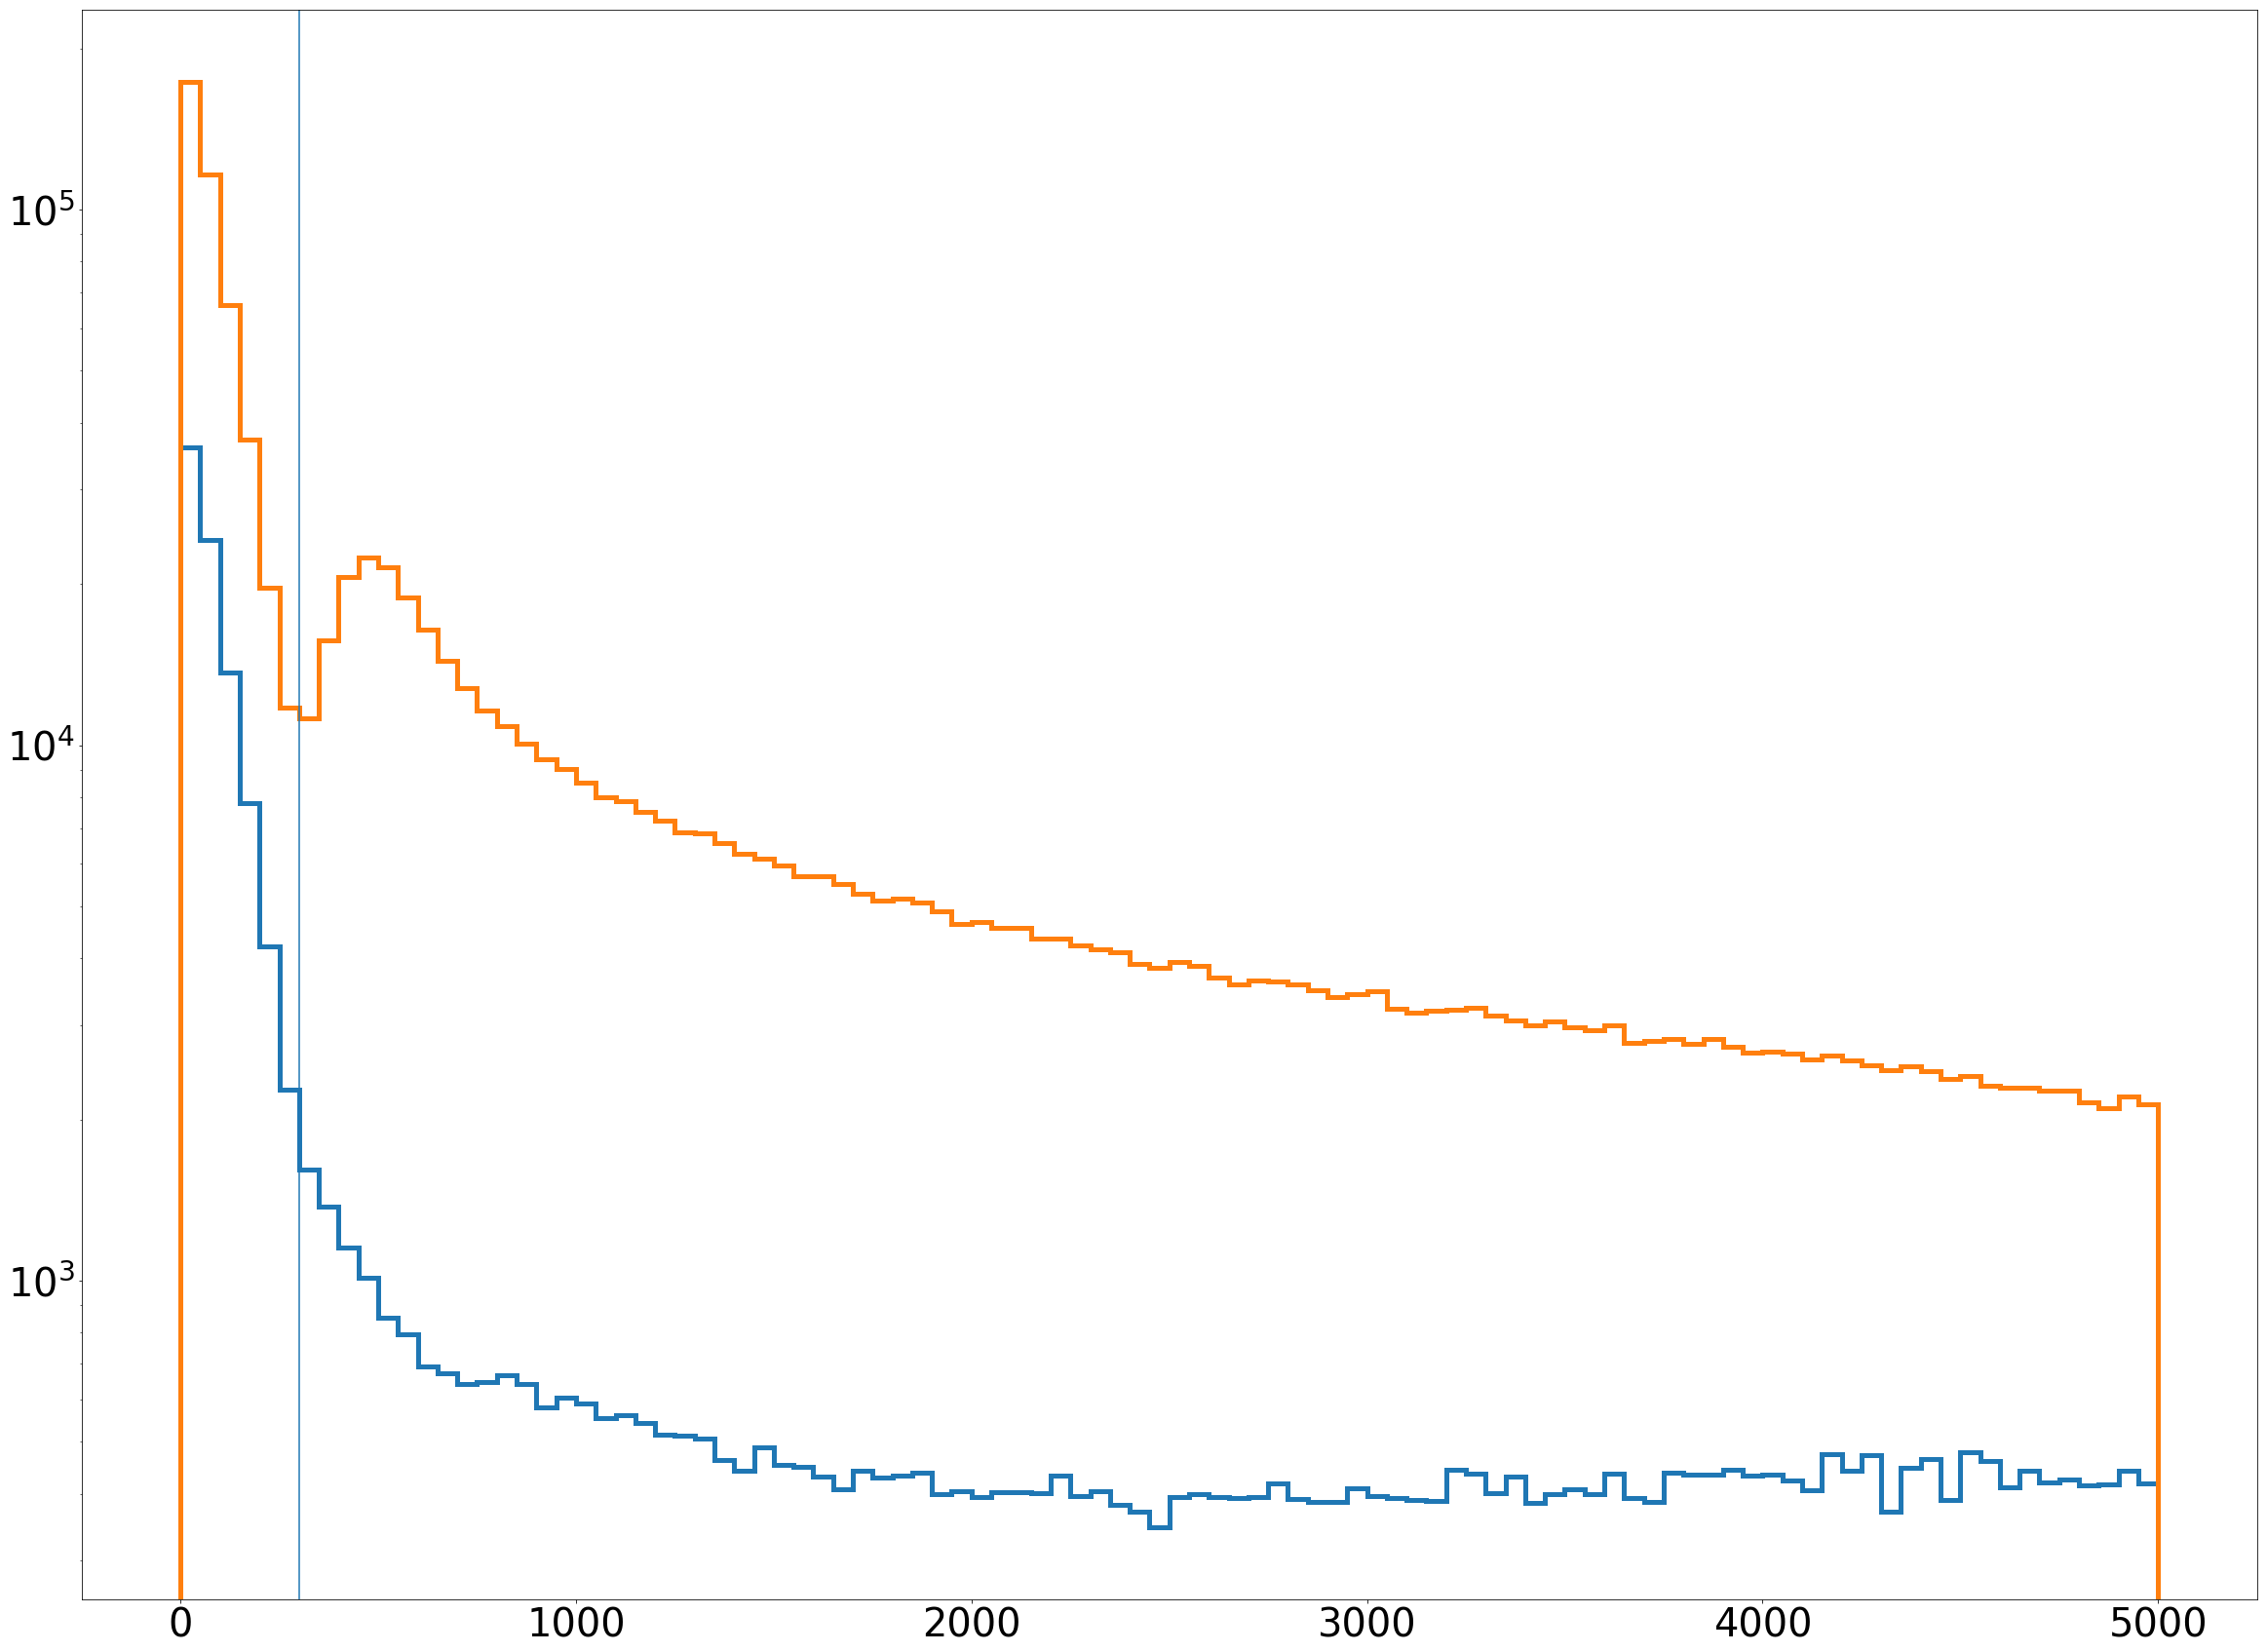

In [29]:
plt.hist(H3_Total_test['Cher_Sum'],bins=100,range=[0,5000],histtype='step',linewidth=5)
plt.hist(H3_Total['Cher_Sum'],bins=100,range=[0,5000],histtype='step',linewidth=5)
plt.yscale('log')
plt.axvline(300,0,1)

In [50]:
len(H3_Total),len(H3_Total_Corrected)

(1276573, 1276573)

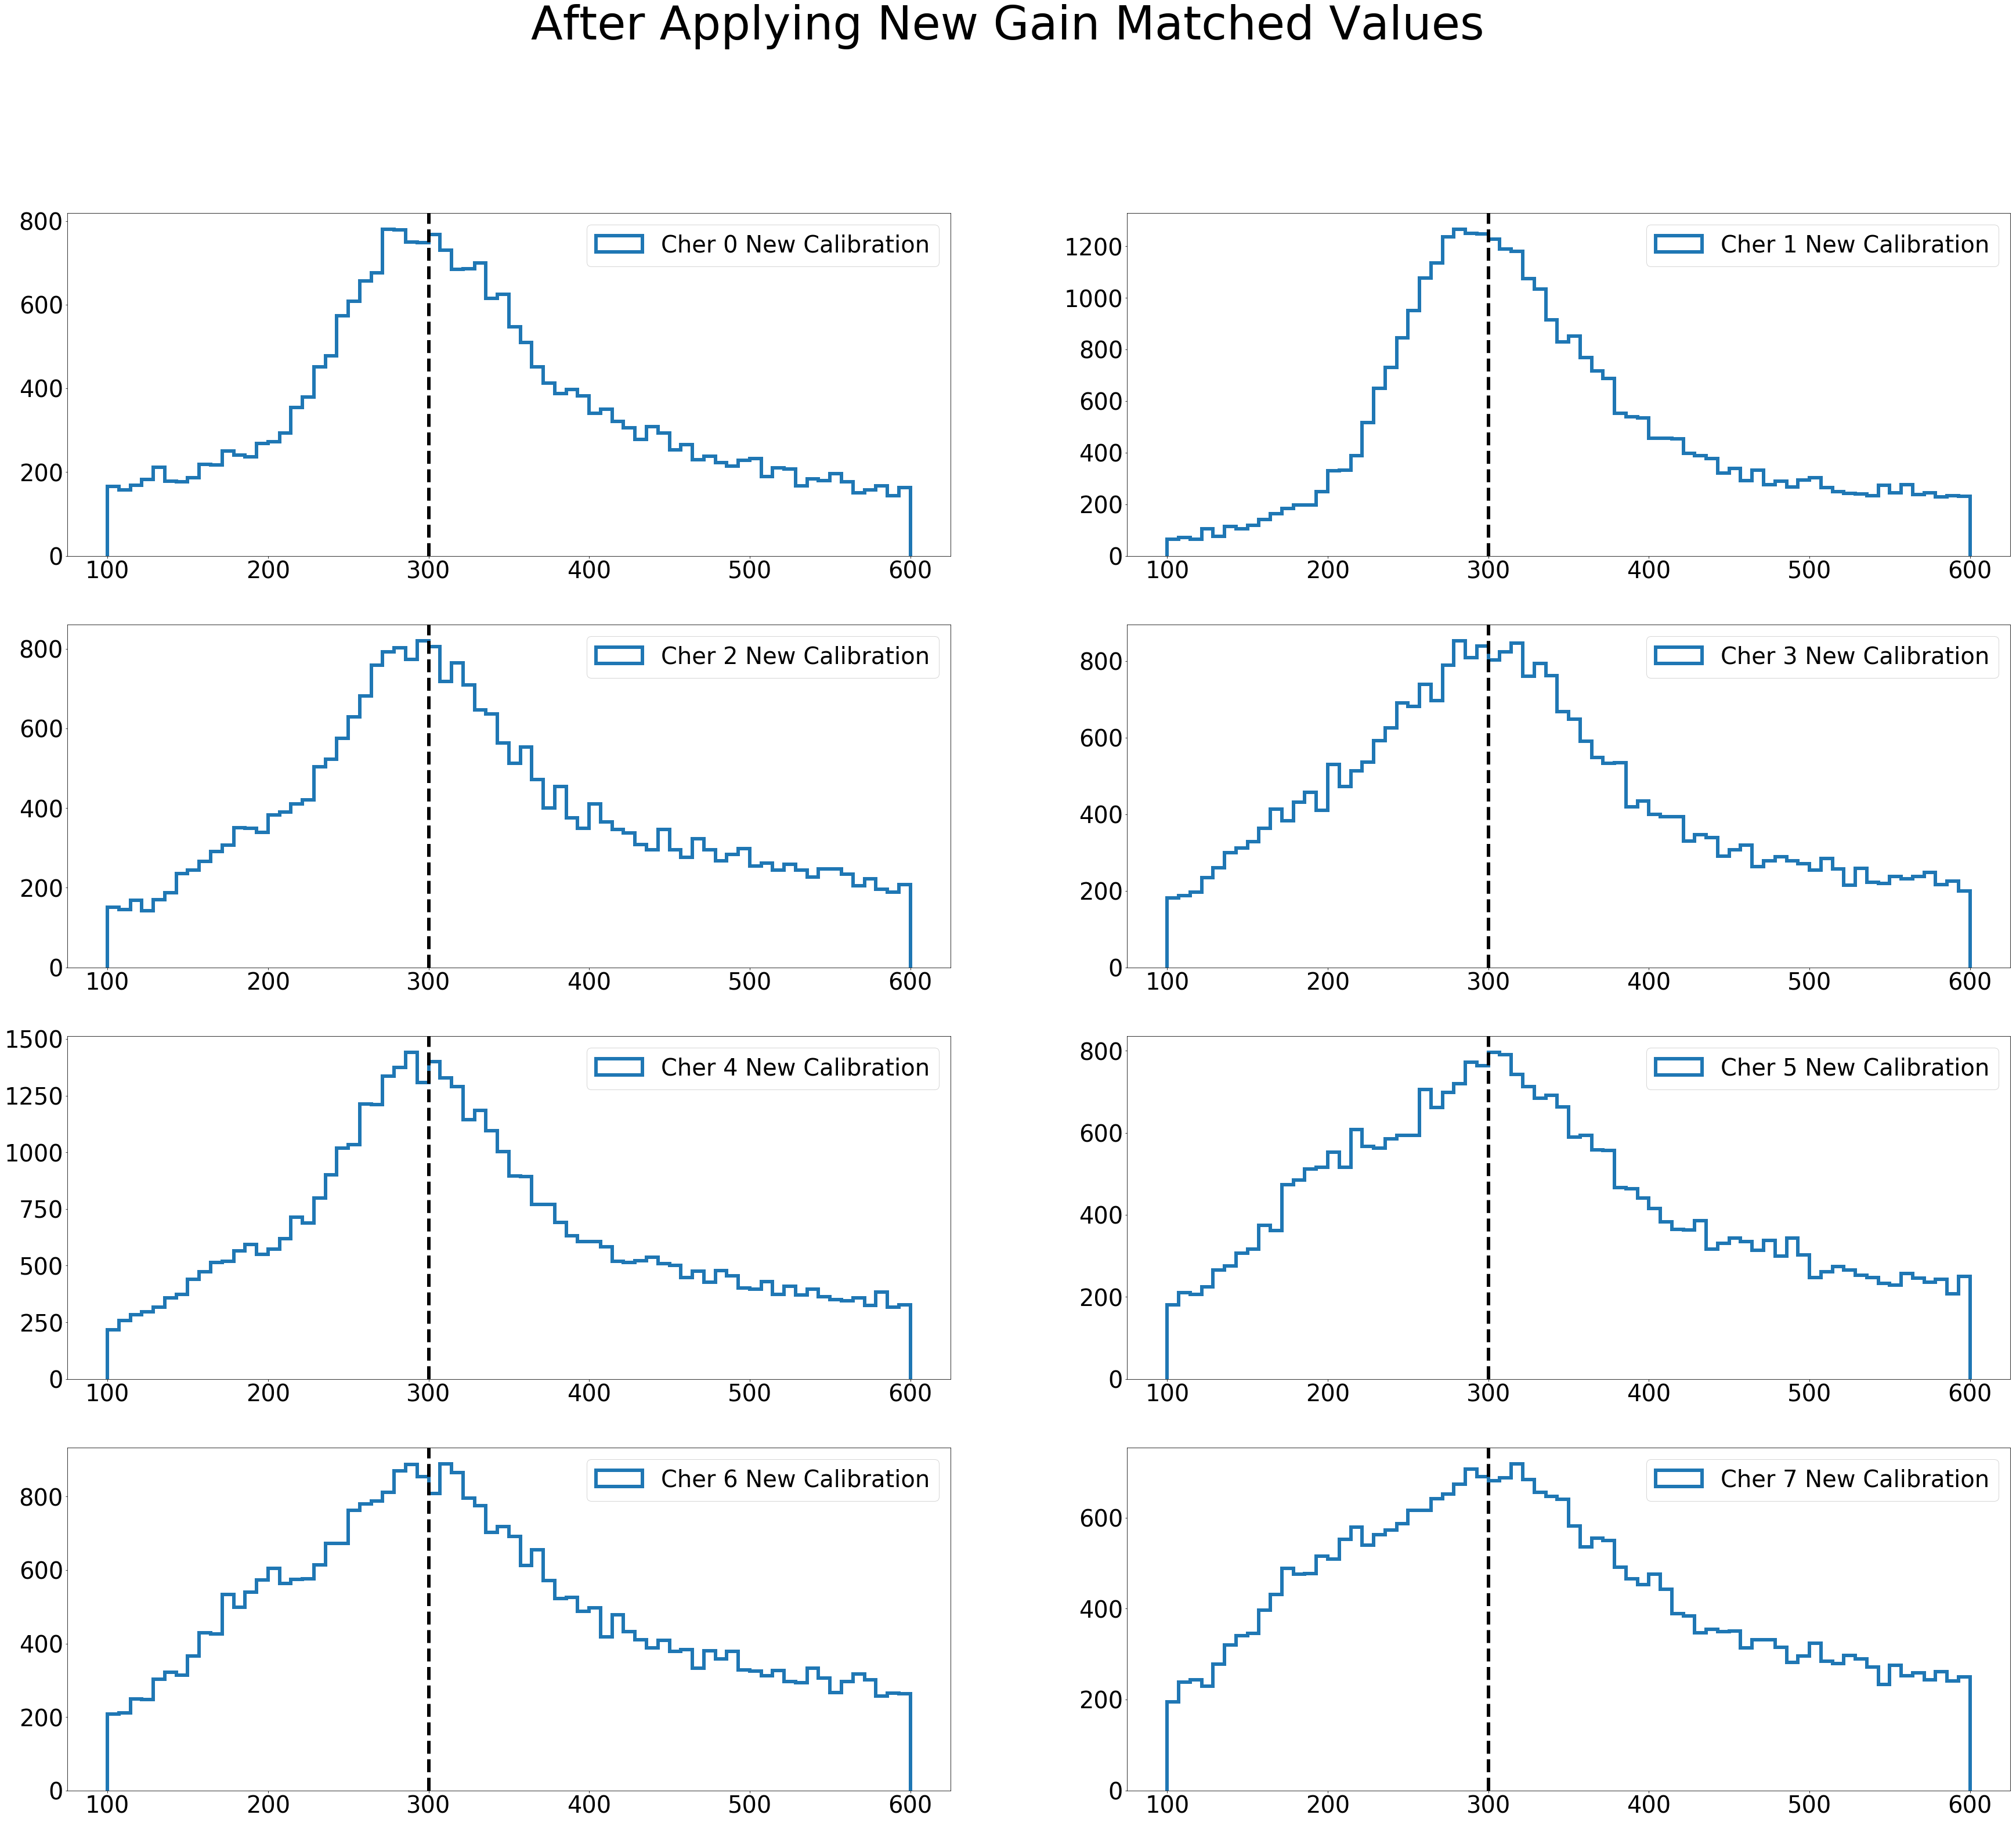

In [37]:
fig3=plt
fig3.suptitle('After Applying New Gain Matched Values',fontsize=80)
for i in range(0,8):
    #plt.subplot(5,2,i+1)
    plt.subplot(4,2,i+1)
    plt.hist(H3_Total_Corrected[Cher[i+10]],bins=70,histtype='step',range=[100,600],linewidth=6,label='Cher %d New Calibration'%i)
    plt.axvline(300,0,1,color='black',linestyle='--',linewidth=6)
    plt.rcParams["figure.figsize"] =[60,50] 
    plt.rc('xtick',labelsize=40)
    plt.rc('ytick',labelsize=40)   
    plt.legend(loc=1,fontsize=40)   
#fig3.savefig('/Users/michaelnycz/Documents/Pass2_Analysis/Images/Final_Ratio_Images/Cherenkov_Calib/New_Gain_Matched.png',fmt='png')


In [35]:
H3_Total_Corrected['Cher_Sum']=H3_Total_Corrected.sum(axis=1)

In [39]:
H3_Total.head()

,Cher_Un_0,Cher_Un_1,Cher_Un_2,Cher_Un_3,Cher_Un_4,Cher_Un_5,Cher_Un_6,Cher_Un_7,Cher_Un_8,Cher_Un_9,...,Cher_Cor_9,Cher_Sum,Track,prl1_e,prl2_e,E_p,z,phi,theta,dp
0,29.0000,-32.6665,-24.3335,-5.000000,751.3330,3.3335,-20.3335,-27.3335,9.0000,-44.0000,...,-43.30000,802.2280,0,111.3550,41.5298,inf,0.000000,0.000000,0.000000,0.000000
1,352.0000,-24.0000,-27.0000,-0.333496,17.3335,-4.0000,4.0000,10.0000,-11.0000,-16.3335,...,-16.07360,352.9020,0,60.7280,24.9520,inf,0.000000,0.000000,0.000000,0.000000
2,-8.0000,26.6665,-7.6665,-10.000000,-1.6665,-2.0000,-5.3335,3860.6700,-9.0000,-6.6665,...,-6.56044,3782.3900,2,60.3643,32.9691,inf,2.274500,-0.000093,-2.472920,-0.135705
3,-2.3335,-37.6665,-9.0000,-16.666500,-16.6665,-3.6665,15.6665,-8.3335,8.3335,-32.0000,...,-31.49090,23.2037,1,118.7970,1348.0700,inf,0.122566,0.008784,-0.014325,-0.012835
4,13.6665,-12.6665,-4.3335,-45.666500,-13.0000,-54.0000,32.0000,-24.3335,3087.6700,-1.0000,...,-0.98409,3140.0200,0,54.4335,25.5048,inf,0.122566,0.008784,-0.014325,-0.012835


In [40]:
H3_Total_Corrected.head()

,Cher_Cor_0,Cher_Cor_1,Cher_Cor_2,Cher_Cor_3,Cher_Cor_4,Cher_Cor_5,Cher_Cor_6,Cher_Cor_7,Cher_Cor_8,Cher_Cor_9,Cher_Sum
0,18.807525,-20.969586,-17.289455,-3.497926,545.435064,2.405909,-14.544323,-20.921910,16.970272,0.514096,506.909666
1,228.284436,-15.406305,-19.184058,-0.233309,12.583367,-2.886947,2.861155,7.654311,-20.741443,0.190841,193.122047
2,-5.188283,17.118010,-5.447207,-6.995853,-1.209806,-1.443473,-3.814992,2955.076713,-16.970272,0.077891,2931.202729
3,-1.513357,-24.179233,-6.394686,-11.659638,-12.099154,-2.646247,11.206070,-6.378720,15.713529,0.373888,-37.577548
4,8.863208,-8.130999,-3.079041,-31.947611,-9.437434,-38.973778,22.889238,-18.625617,5822.066543,0.011684,5743.636194


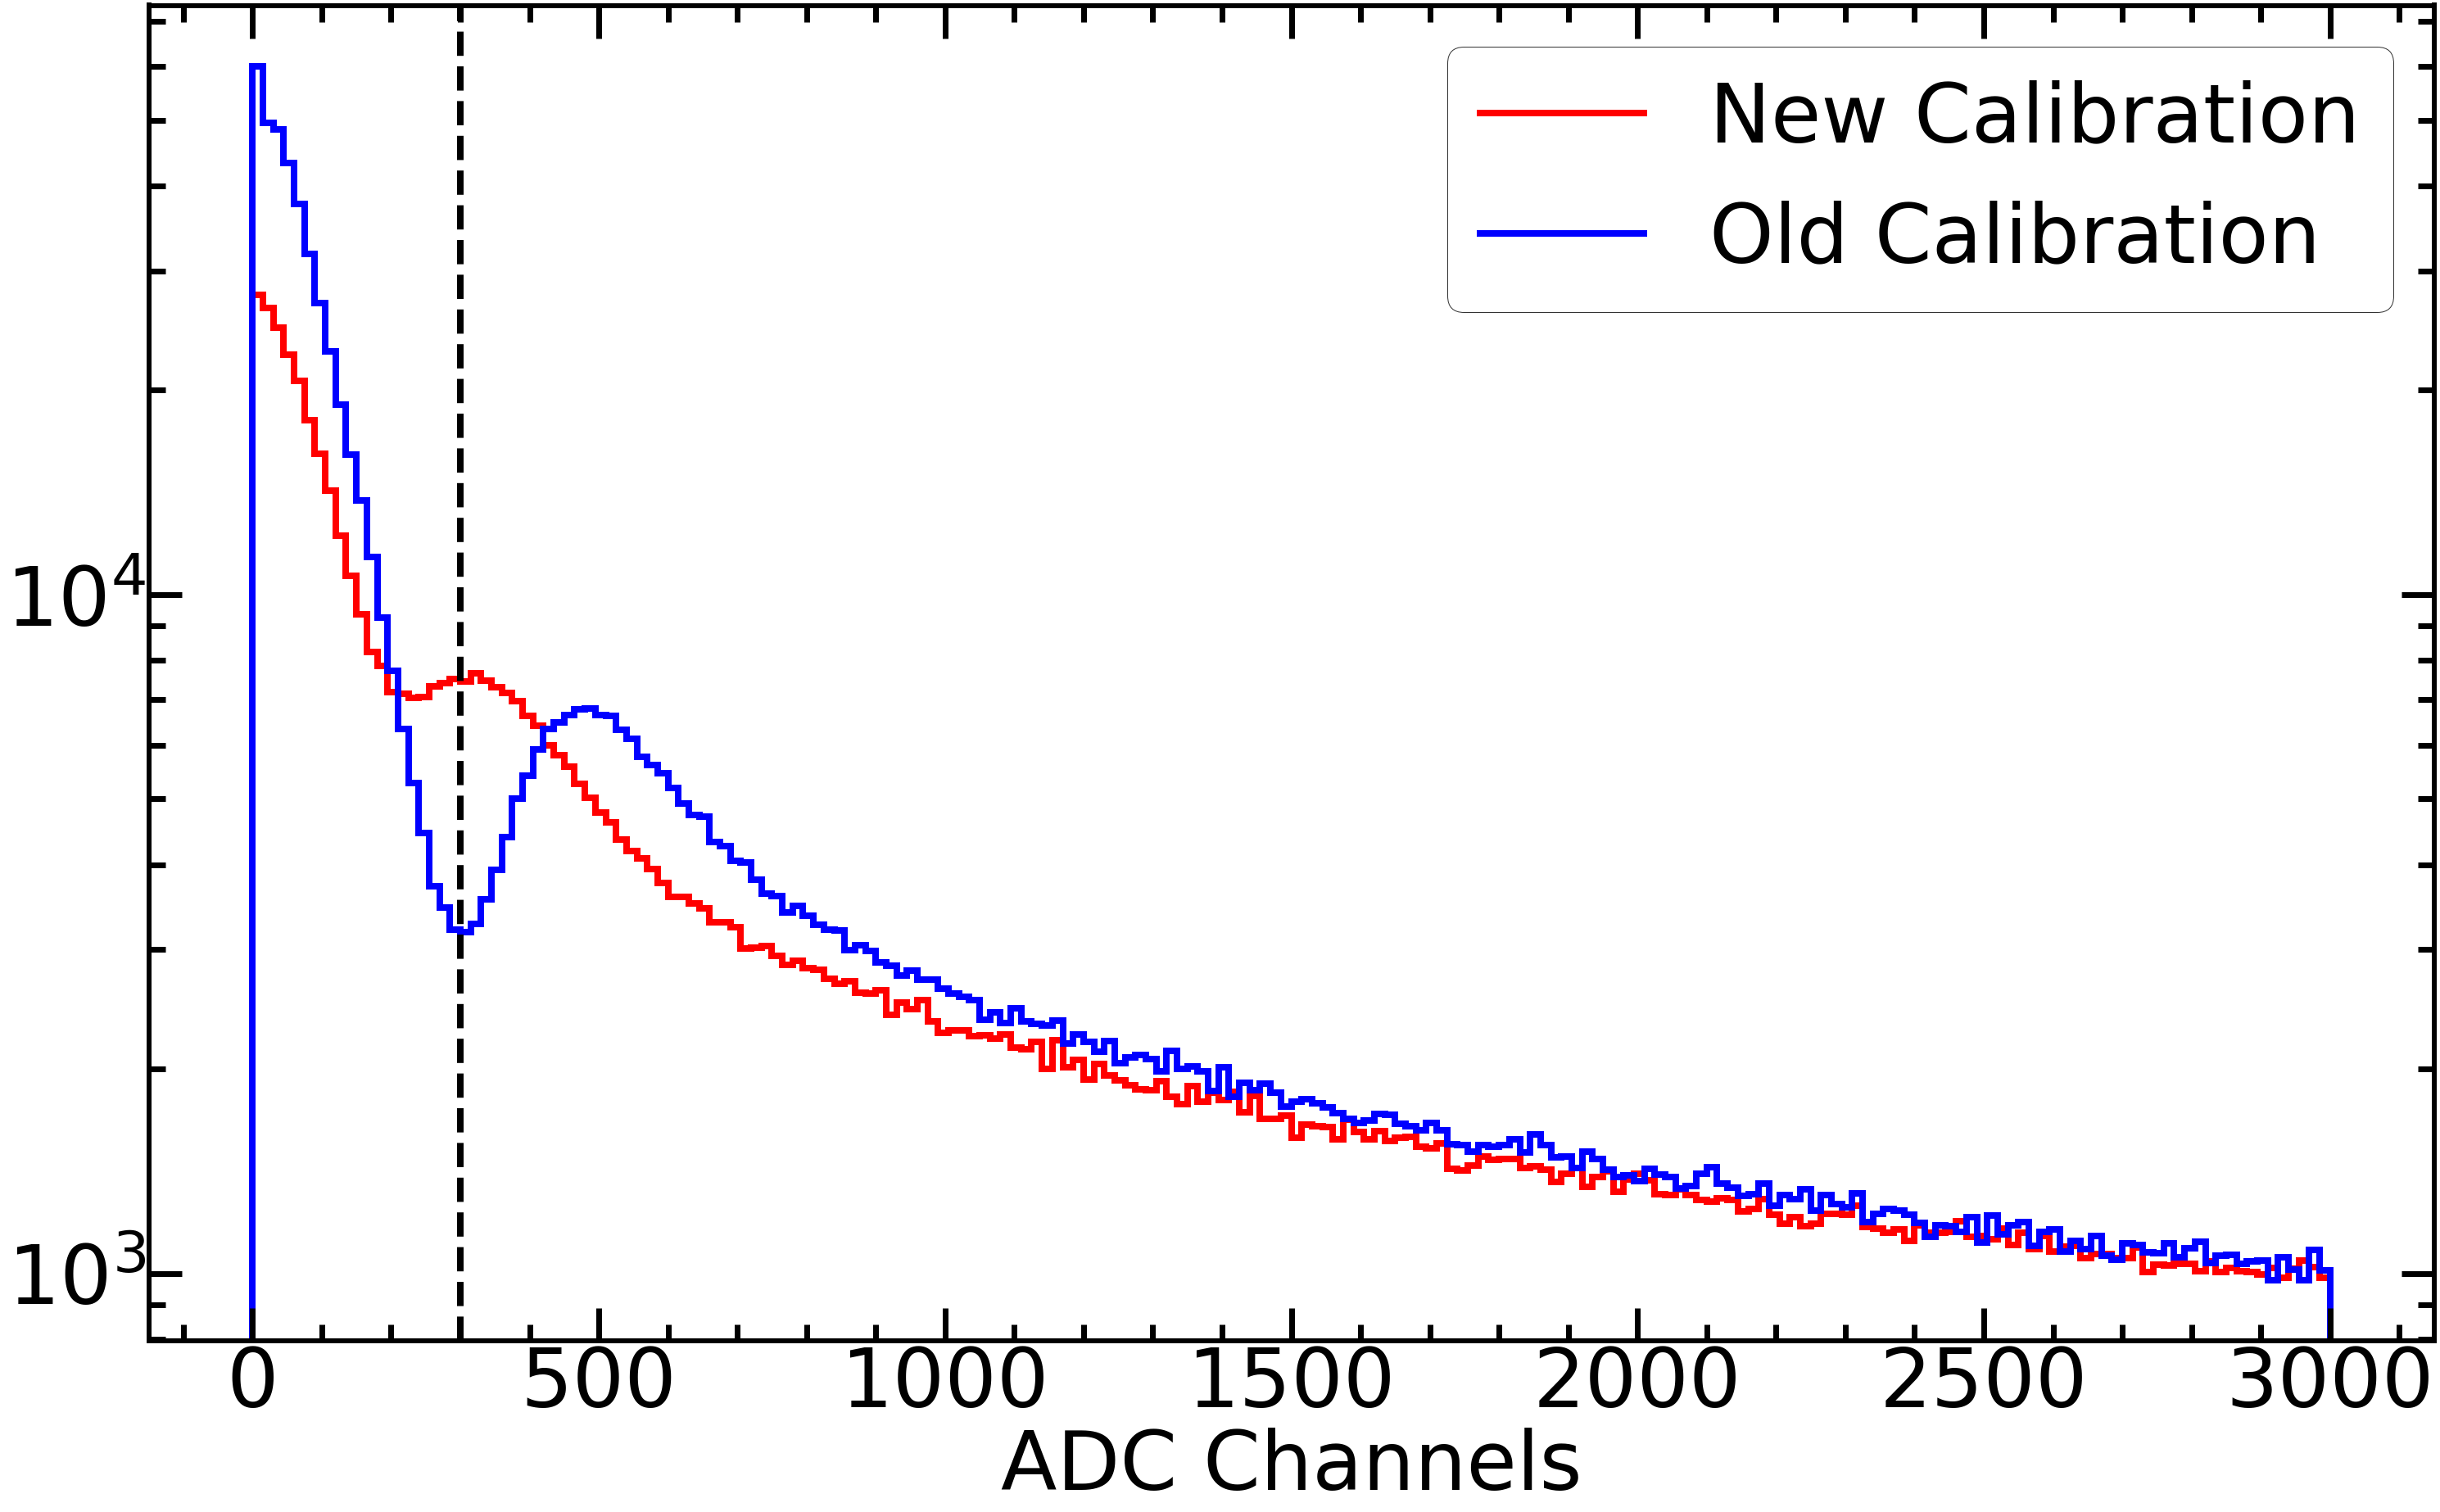

In [64]:
fig4=plt
plt.hist(H3_Total_Corrected['Cher_Sum'],bins=200,histtype='step',range=[0,3000],color='red',linewidth=8,label='New Calibration')
plt.hist(H3_Total['Cher_Sum'],bins=200,histtype='step',range=[0,3000],linewidth=8,color='blue',label='Old Calibration')
#plt.axvline(2000,0,1,color='black',linestyle='--',linewidth=5,label='Current Cherenkov Sum Cut')
plt.axvline(300,0,1,color='black',linestyle='--',linewidth=8,label='SPE aligned to channel 300')
#plt.axvline(500,0,1,color='blue',linestyle='--',linewidth=5,label='Current Cherenkov Sum Cut')
plt.rcParams["figure.figsize"] =[50,30]
plt.yscale('log')
#plt.title('Cherenkov Sum Old vs Cherenkov Sum New',fontsize=100)
#plt.rcParams["figure.figsize"] =[60,50] 
plt.xlabel('ADC Channels',fontsize=100)
plt.tick_params(which='both',top=True,right=True)
#plt.rc('xtick',labelsize=100)
#plt.rc('ytick',labelsize=100)   
plt.rcParams["axes.linewidth"]  = 6
handle1 = mt.lines.Line2D([], [], c='r',label='New Calibration',linewidth=8)
handle2 = mt.lines.Line2D([], [], c='b',label='Old Calibration',linewidth=8)
legend=plt.legend(handles=[handle1, handle2],fontsize=100,frameon=True)
legend.get_frame().set_edgecolor('black')
plt.minorticks_on()
plt.rcParams['xtick.major.size'] = 40
plt.rcParams['xtick.major.width'] = 7
plt.rcParams['xtick.minor.size'] = 20
plt.rcParams['xtick.minor.width'] = 7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 40
plt.rcParams['ytick.major.width'] = 7
plt.rcParams['ytick.minor.size'] = 20
plt.rcParams['ytick.minor.width'] = 7
plt.rcParams['ytick.direction'] = 'in'


#plt.legend(fontsize=90)
#plt.text(1000,3500,'Note : No cuts applied to Cherenkov Sum',fontsize=90,color='black')
#fig4.savefig('/Users/michaelnycz/Documents/Pass2_Analysis/Images/Final_Ratio_Images/Cherenkov_Calib/Cher_Sum_Comparison_2.jpeg',edgecolor='black',fmt='jpeg')
fig4.savefig('/Users/michaelnycz/Documents/Pass2_Analysis/Thesis/ThesisImages/Cher_Sum_Comparison.pdf',fmt='pdf')



In [144]:
H3_Total.head()

,Cher_Un_0,Cher_Un_1,Cher_Un_2,Cher_Un_3,Cher_Un_4,Cher_Un_5,Cher_Un_6,Cher_Un_7,Cher_Un_8,Cher_Un_9,...,Cher_Sum,Track,prl1_e,prl2_e,E_p,z,phi,theta,dp,0
0,29.0000,-32.6665,-24.3335,-5.000000,751.3330,3.3335,-20.3335,-27.3335,9.0000,-44.0000,...,802.2280,0,111.3550,41.5298,inf,0.000000,0.000000,0.000000,0.000000,18.807525
1,352.0000,-24.0000,-27.0000,-0.333496,17.3335,-4.0000,4.0000,10.0000,-11.0000,-16.3335,...,352.9020,0,60.7280,24.9520,inf,0.000000,0.000000,0.000000,0.000000,228.284436
2,-8.0000,26.6665,-7.6665,-10.000000,-1.6665,-2.0000,-5.3335,3860.6700,-9.0000,-6.6665,...,3782.3900,2,60.3643,32.9691,inf,2.274500,-0.000093,-2.472920,-0.135705,-5.188283
3,-2.3335,-37.6665,-9.0000,-16.666500,-16.6665,-3.6665,15.6665,-8.3335,8.3335,-32.0000,...,23.2037,1,118.7970,1348.0700,inf,0.122566,0.008784,-0.014325,-0.012835,-1.513357
4,13.6665,-12.6665,-4.3335,-45.666500,-13.0000,-54.0000,32.0000,-24.3335,3087.6700,-1.0000,...,3140.0200,0,54.4335,25.5048,inf,0.122566,0.008784,-0.014325,-0.012835,8.863208


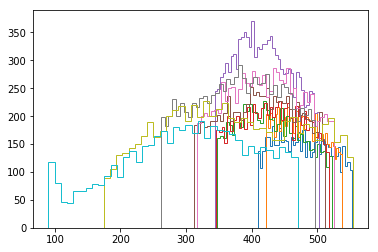

In [94]:
y_data_fit=[[],]*10
x_data_fit=[[],]*10
x_boarder_fit = [[],]*10
for i in range(0,10):
    if (i<8):
        y_data_fit[i],x_boarder_fit[i],_ = plt.hist(H3_Total[Cher[i]],bins=40,range=[Gauss_Mean[i]-(Gauss_Sigma[i]/2),Gauss_Mean[i]+(Gauss_Sigma[i]/2)],histtype='step')
        x_data_fit[i] = x_boarder_fit[i][:-1] + np.diff(x_boarder_fit[i]) / 2
    elif(i>7):
        y_data_fit[i],x_boarder_fit[i],_ = plt.hist(H3_Total[Cher[i]],bins=40,range=[Gauss_Mean[i]-180,Gauss_Mean[i]+200],histtype='step')
        x_data_fit[i] = x_boarder_fit[i][:-1] + np.diff(x_boarder_fit[i]) / 2

In [40]:
(Gauss_Sigma[i]/2)

10

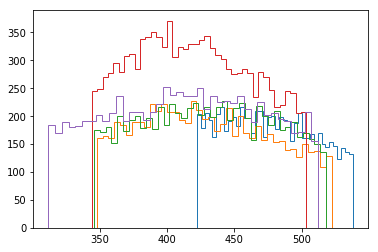

In [99]:
for i in range(1,6):
    plt.hist(H3_Total[Cher[i]],bins=40,histtype='step',range=[Gauss_Mean[i]-(Gauss_Sigma[i]/2),Gauss_Mean[i]+(Gauss_Sigma[i]/2)])
    
    
    

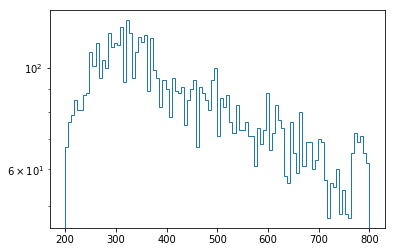

In [57]:
plt.hist(H3_Total[Cher[9]],bins=100,histtype='step',range=[200,800])
plt.yscale('log')

In [11]:
print(Gaussian_output.fit_report(min_correl=0.1))

[[Model]]
    Model(gaussian, prefix='gaus_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 100
    # variables        = 3
    chi-square         = 1025104.30
    reduced chi-square = 10568.0856
    Akaike info crit   = 929.513474
    Bayesian info crit = 937.328984
[[Variables]]
    gaus_sigma:      177.817190 +/- 9.57111241 (5.38%) (init = 114)
    gaus_center:     488.255546 +/- 9.35275198 (1.92%) (init = 470.5)
    gaus_amplitude:  304303.610 +/- 13970.7428 (4.59%) (init = 271206)
    gaus_fwhm:       418.727476 +/- 22.5382469 (5.38%) == '2.3548200*gaus_sigma'
    gaus_height:     682.721292 +/- 31.1152650 (4.56%) == '0.3989423*gaus_amplitude/max(1.e-15, gaus_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(gaus_sigma, gaus_amplitude) =  0.592



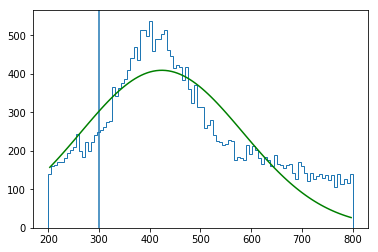

In [67]:
plt.hist(H3_Total['Cher_4'],bins=100,histtype='step',range=[200,800])
plt.axvline(300,0,1)
#plt.yscale('log')
plt.plot(x_data[0],Gaussian_output[4].best_fit,'g-',label='Gaussian fit')